# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Colab Notebooks

/content/drive/My Drive/Python Collabs/Colab Notebooks


In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.optimizers import Adam, SGD, RMSprop, Adagrad
import sklearn
import pandas as pd

In [4]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [5]:
cd/content/drive/My Drive/Python Collabs/Colab Notebooks
train_dataset = h5py.File('/content/drive/My Drive/Python Collabs/Colab Notebooks/train/train_happy.h5')
train_dataset['train_set_x'].shape

SyntaxError: ignored

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [6]:
path_to_train='/content/drive/My Drive/Python Collabs/Colab Notebooks/train/train_happy.h5'
path_to_test='/content/drive/My Drive/Python Collabs/Colab Notebooks/test/test_happy.h5'

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset(path_to_train,path_to_test)

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


Image shape : (64, 64, 3)


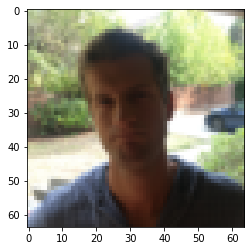

In [8]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [9]:
batch_size = 5
epochs = 20

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1, activation='sigmoid'),
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 1)                 30753     
                                                                 
Total params: 31,777
Trainable params: 31,713
Non-traina

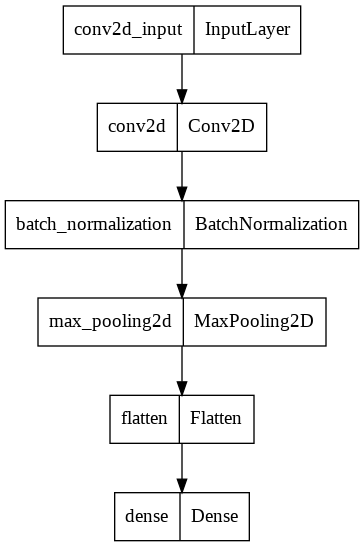

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [12]:
Y_test=Y_test.T

In [13]:
Y_test.shape

(150, 1)

In [14]:
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=["accuracy"])

In [15]:
history_model = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test,Y_test))

Epoch 1/20
120/120 [==============================] - 4s 23ms/step - loss: 0.8872 - accuracy: 0.7783 - val_loss: 0.4801 - val_accuracy: 0.8933
Epoch 2/20
120/120 [==============================] - 3s 21ms/step - loss: 0.2366 - accuracy: 0.9267 - val_loss: 0.3574 - val_accuracy: 0.9133
Epoch 3/20
120/120 [==============================] - 3s 21ms/step - loss: 0.1669 - accuracy: 0.9483 - val_loss: 0.3463 - val_accuracy: 0.8667
Epoch 4/20
120/120 [==============================] - 3s 22ms/step - loss: 0.0826 - accuracy: 0.9667 - val_loss: 0.2837 - val_accuracy: 0.8733
Epoch 5/20
120/120 [==============================] - 3s 22ms/step - loss: 0.0632 - accuracy: 0.9833 - val_loss: 0.0954 - val_accuracy: 0.9533
Epoch 6/20
120/120 [==============================] - 3s 23ms/step - loss: 0.0679 - accuracy: 0.9850 - val_loss: 0.1722 - val_accuracy: 0.9400
Epoch 7/20
120/120 [==============================] - 3s 21ms/step - loss: 0.0498 - accuracy: 0.9867 - val_loss: 0.1099 - val_accuracy: 0.9600

# Evaluate / Test

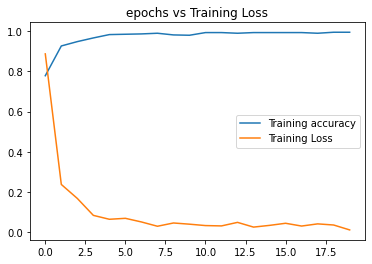

In [16]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

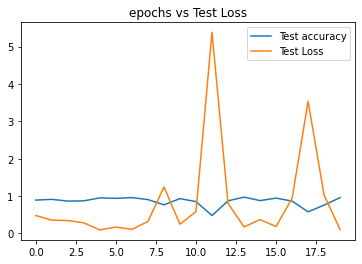

In [17]:
test_accuracy = history_model.history['val_accuracy']
test_loss = history_model.history['val_loss']

count = range(len(test_accuracy))
plt.plot(count, test_accuracy, label='Test accuracy')
plt.plot(count, test_loss, label='Test Loss')
plt.title('epochs vs Test Loss')
plt.legend()

Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=64)
predicted_val = [int(round(p[0])) for p in predictions]
print("classification report ",classification_report(Y_test,predicted_val,target_names=['not_smiling','smiling']))

[INFO] evaluating network...
3/3 [==============================] - 0s 76ms/step
classification report                precision    recall  f1-score   support

 not_smiling       0.94      0.97      0.96        66
     smiling       0.98      0.95      0.96        84

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Text(33.0, 0.5, 'Actual')

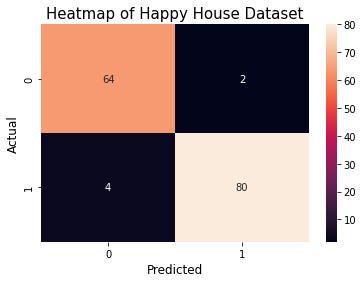

In [19]:
r = sklearn.metrics.confusion_matrix(Y_test,predicted_val)
sns.heatmap(r, annot=True)
plt.title('Heatmap of Happy House Dataset', fontsize = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

In [20]:
evals = model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 31ms/step - loss: 0.1027 - accuracy: 0.9600


In [21]:
print("Loss "+str(evals[0]))
print("accuracy "+str(evals[1]))

Loss 0.10271695256233215
accuracy 0.9599999785423279


#Adding Additional Block to the Model

In [22]:
batch_size = 5
epochs = 20

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1, activation='sigmoid'),
    
])

In [27]:
Y_test=Y_test.T

In [24]:
Y_test.shape

(1, 150)

In [25]:
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=["accuracy"])

In [28]:
history_model = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test,Y_test))

Epoch 1/20
120/120 [==============================] - 4s 37ms/step - loss: 0.3297 - accuracy: 0.8983 - val_loss: 1.2613 - val_accuracy: 0.4400
Epoch 2/20
120/120 [==============================] - 4s 36ms/step - loss: 0.2233 - accuracy: 0.9433 - val_loss: 1.1292 - val_accuracy: 0.6200
Epoch 3/20
120/120 [==============================] - 4s 36ms/step - loss: 0.1994 - accuracy: 0.9400 - val_loss: 0.6063 - val_accuracy: 0.7133
Epoch 4/20
120/120 [==============================] - 4s 36ms/step - loss: 0.1102 - accuracy: 0.9700 - val_loss: 0.3138 - val_accuracy: 0.9000
Epoch 5/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0933 - accuracy: 0.9733 - val_loss: 0.2038 - val_accuracy: 0.9133
Epoch 6/20
120/120 [==============================] - 4s 36ms/step - loss: 0.0929 - accuracy: 0.9750 - val_loss: 0.2731 - val_accuracy: 0.9133
Epoch 7/20
120/120 [==============================] - 4s 36ms/step - loss: 0.0965 - accuracy: 0.9817 - val_loss: 0.1831 - val_accuracy: 0.9267

#Evaluate /Test with additional Block

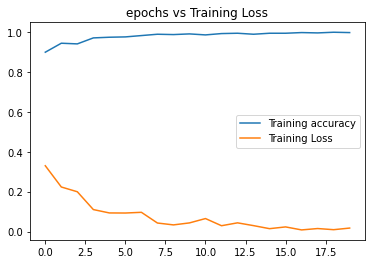

In [29]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

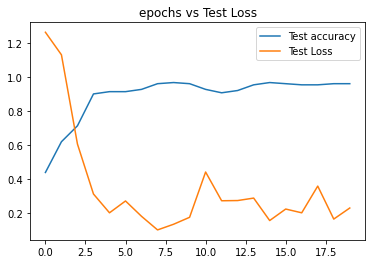

In [30]:
test_accuracy = history_model.history['val_accuracy']
test_loss = history_model.history['val_loss']

count = range(len(test_accuracy))
plt.plot(count, test_accuracy, label='Test accuracy')
plt.plot(count, test_loss, label='Test Loss')
plt.title('epochs vs Test Loss')
plt.legend()

Text(33.0, 0.5, 'Actual')

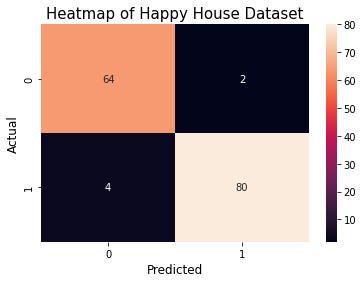

In [31]:
r = sklearn.metrics.confusion_matrix(Y_test,predicted_val)
sns.heatmap(r, annot=True)
plt.title('Heatmap of Happy House Dataset', fontsize = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

In [32]:
evals = model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 42ms/step - loss: 0.2319 - accuracy: 0.9600


**Conclusion**

We notice that with the addition of a new block (Conv/BatchNorma/MaxPooling)

The accuracy of the testing dataset has been improved , and this is due to the 

Further processing of the data by the neural network wich gave him the ability 

to learn more about the features.

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


**THE LOOP**

In [33]:
Model_optimizers=[Adam(), SGD(), RMSprop(), Adagrad()]

In [34]:
batch_size = 5
epochs = 20

model_list=[]
history_model_list=[]                          # Empty list for history model

for i in range(0,len(Model_optimizers)):       # The loop
                                              
                                               # Model Building

 model = Sequential([     
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1, activation='sigmoid'),
    
 ])

                                             # Model Compiling

 model.compile(optimizer=Model_optimizers[i], loss='binary_crossentropy', metrics=["accuracy"])

                                                                                                   
                                             # Model Training & History
                                             
 history_model = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test,Y_test))
 
 model_list.append(model)
 history_model_list.append(history_model)    


Epoch 1/20
120/120 [==============================] - 3s 23ms/step - loss: 0.3967 - accuracy: 0.8300 - val_loss: 0.5031 - val_accuracy: 0.7200
Epoch 2/20
120/120 [==============================] - 3s 23ms/step - loss: 0.1894 - accuracy: 0.9267 - val_loss: 0.4772 - val_accuracy: 0.7467
Epoch 3/20
120/120 [==============================] - 3s 22ms/step - loss: 0.1813 - accuracy: 0.9450 - val_loss: 0.3750 - val_accuracy: 0.8133
Epoch 4/20
120/120 [==============================] - 3s 22ms/step - loss: 0.1269 - accuracy: 0.9633 - val_loss: 0.1626 - val_accuracy: 0.9533
Epoch 5/20
120/120 [==============================] - 3s 23ms/step - loss: 0.0703 - accuracy: 0.9800 - val_loss: 0.1083 - val_accuracy: 0.9600
Epoch 6/20
120/120 [==============================] - 4s 29ms/step - loss: 0.1026 - accuracy: 0.9600 - val_loss: 0.2979 - val_accuracy: 0.9000
Epoch 7/20
120/120 [==============================] - 4s 31ms/step - loss: 0.1062 - accuracy: 0.9717 - val_loss: 0.2747 - val_accuracy: 0.9133

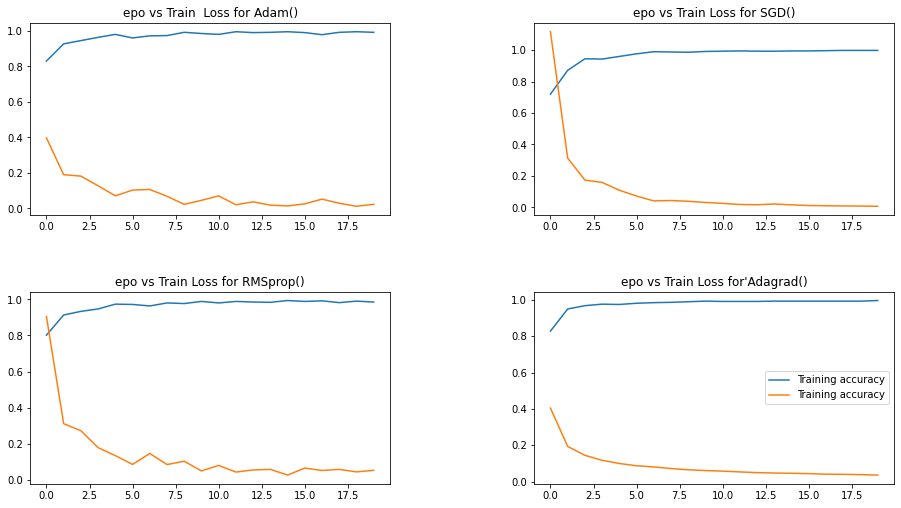

In [35]:
figure, axis = plt.subplots(2, 2, figsize=(15,8))

train_accuracy_list=[]
train_loss_list=[]
count_list=[]

for i in range(0,len(Model_optimizers)):

    train_accuracy = history_model_list[i].history['accuracy']
    train_loss = history_model_list[i].history['loss']
    count = range(len(train_accuracy))
    
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)
    count_list.append(count)


axis[0, 0].plot(count, train_accuracy_list[0], label='Training accuracy')
axis[0, 0].plot(count, train_loss_list[0], label='Training accuracy')
axis[0, 0].set_title('epo vs Train  Loss for Adam()')
plt.legend()


axis[0, 1].plot(count, train_accuracy_list[1], label='Training accuracy')
axis[0, 1].plot(count, train_loss_list[1], label='Training accuracy')
axis[0, 1].set_title("epo vs Train Loss for SGD()")
plt.legend()  


axis[1, 0].plot(count, train_accuracy_list[2], label='Training accuracy')
axis[1, 0].plot(count, train_loss_list[2], label='Training accuracy')
axis[1, 0].set_title("epo vs Train Loss for RMSprop()")
plt.legend()


axis[1, 1].plot(count, train_accuracy_list[3], label='Training accuracy')
axis[1, 1].plot(count, train_loss_list[3], label='Training accuracy')
axis[1, 1].set_title("epo vs Train Loss for'Adagrad()")
plt.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

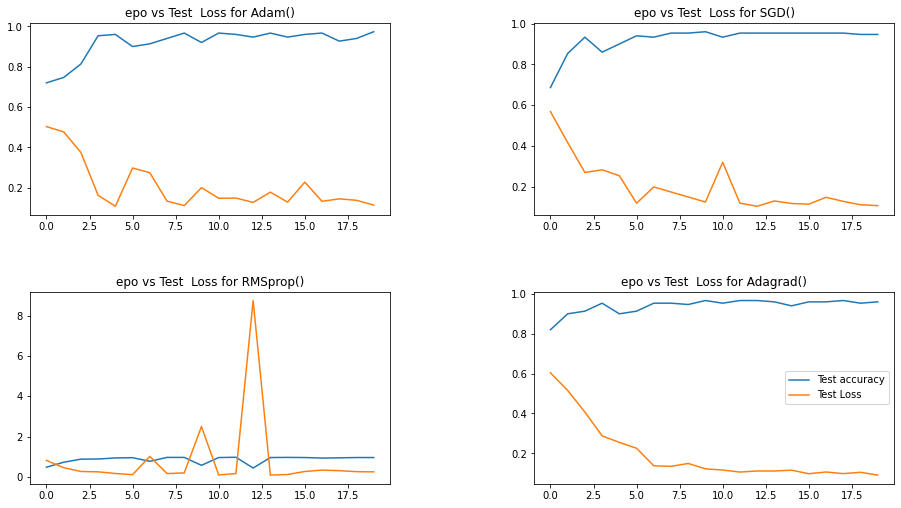

In [36]:
figure, axis = plt.subplots(2, 2, figsize=(15,8))

test_accuracy_list=[]
test_loss_list=[]
count_list=[]

for i in range(0,len(Model_optimizers)):

    test_accuracy = history_model_list[i].history['val_accuracy']
    test_loss = history_model_list[i].history['val_loss']
    count = range(len(test_accuracy))

    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)
    count_list.append(count)


axis[0, 0].plot(count, test_accuracy_list[0], label='Test accuracy')
axis[0, 0].plot(count, test_loss_list[0], label='Test Loss')
axis[0, 0].set_title('epo vs Test  Loss for Adam()')
plt.legend()

axis[0, 1].plot(count, test_accuracy_list[1], label='Test accuracy')
axis[0, 1].plot(count, test_loss_list[1], label='Test Loss')
axis[0, 1].set_title('epo vs Test  Loss for SGD()')
plt.legend()

axis[1, 0].plot(count, test_accuracy_list[2], label='Test accuracy')
axis[1, 0].plot(count, test_loss_list[2], label='Test Loss')
axis[1, 0].set_title('epo vs Test  Loss for RMSprop()')
plt.legend()

axis[1, 1].plot(count, test_accuracy_list[3], label='Test accuracy')
axis[1, 1].plot(count, test_loss_list[3], label='Test Loss')
axis[1, 1].set_title('epo vs Test  Loss for Adagrad()')
plt.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [37]:
from sklearn.metrics import classification_report

predicted_val_list=[]
list_opt=['Adam','SGD','RMSprop','Adagard']

for i in range(0,len(Model_optimizers)):
 print("[INFO] evaluating network for "+ list_opt[i])
 predictions = model_list[i].predict(X_test, batch_size=64)
 predicted_val = [int(round(p[0])) for p in predictions]
 print("classification report ",classification_report(Y_test,predicted_val,target_names=['not_smiling','smiling']))
 predicted_val_list.append(predicted_val)

[INFO] evaluating network for Adam
3/3 [==============================] - 0s 45ms/step
classification report                precision    recall  f1-score   support

 not_smiling       0.97      0.97      0.97        66
     smiling       0.98      0.98      0.98        84

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[INFO] evaluating network for SGD
3/3 [==============================] - 0s 48ms/step
classification report                precision    recall  f1-score   support

 not_smiling       0.94      0.94      0.94        66
     smiling       0.95      0.95      0.95        84

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

[INFO] evaluating network for RMSprop
3/3 [==============================] - 0s 42ms/step
classification report                

3/3 [==============================] - 0s 45ms/step
classification report                precision    recall  f1-score   support

 not_smiling       0.95      0.95      0.95        66
     smiling       0.96      0.96      0.96        84

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Text(0.5, 1.0, 'Adagard')

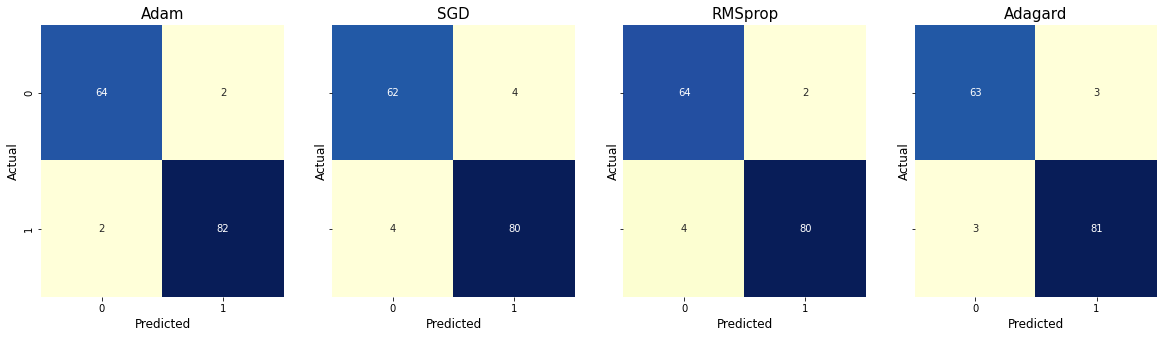

In [38]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True,figsize=(20,5))

r = sklearn.metrics.confusion_matrix(Y_test,predicted_val_list[0])
g1 = sns.heatmap(r, annot=True,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('Actual', fontsize = 12)
g1.set_xlabel('Predicted', fontsize = 12)
ax1.set_title(list_opt[0],fontsize=15)

r = sklearn.metrics.confusion_matrix(Y_test,predicted_val_list[1])
g2 = sns.heatmap(r, annot=True,cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('Actual', fontsize = 12)
g2.set_xlabel('Predicted', fontsize = 12)
ax2.set_title(list_opt[1],fontsize=15)


r = sklearn.metrics.confusion_matrix(Y_test,predicted_val_list[2])
g3 = sns.heatmap(r, annot=True,cmap="YlGnBu",cbar=False,ax=ax3)
g3.set_ylabel('Actual', fontsize = 12)
g3.set_xlabel('Predicted', fontsize = 12)
ax3.set_title(list_opt[2],fontsize=15)


r = sklearn.metrics.confusion_matrix(Y_test,predicted_val_list[3])
g4 = sns.heatmap(r, annot=True,cmap="YlGnBu",cbar=False,ax=ax4)
g4.set_ylabel('Actual', fontsize = 12)
g4.set_xlabel('Predicted', fontsize = 12)
ax4.set_title(list_opt[3],fontsize=15)

In [39]:
list_evals=[]
for i in range(0,4):
  evals = model_list[i].evaluate(X_test,Y_test)
  list_evals.append(evals)

5/5 [==============================] - 0s 33ms/step - loss: 0.0908 - accuracy: 0.9600


In [40]:
for i in range(0,4):
 print("Loss "+list_opt[i] + str(list_evals[i][0]))
 print("accuracy "+list_opt[i] +str(list_evals[i][1]))

Loss Adam0.11414609104394913
accuracy Adam0.9733333587646484
Loss SGD0.1085544228553772
accuracy SGD0.9466666579246521
Loss RMSprop0.24953612685203552
accuracy RMSprop0.9599999785423279
Loss Adagard0.09077950567007065
accuracy Adagard0.9599999785423279


**Conclusion**
The Adagard optimizer give the best model performance = 96%

Image shape : (64, 64, 3)


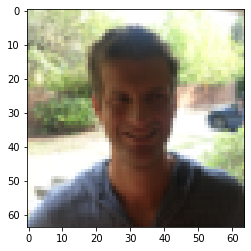

In [41]:
print("Image shape :",X_test_orig[1].shape)
imshow(X_test_orig[1])

In [42]:
Y_test_orig.shape

(1, 150)

In [43]:
target_names=['not_smiling','smiling']

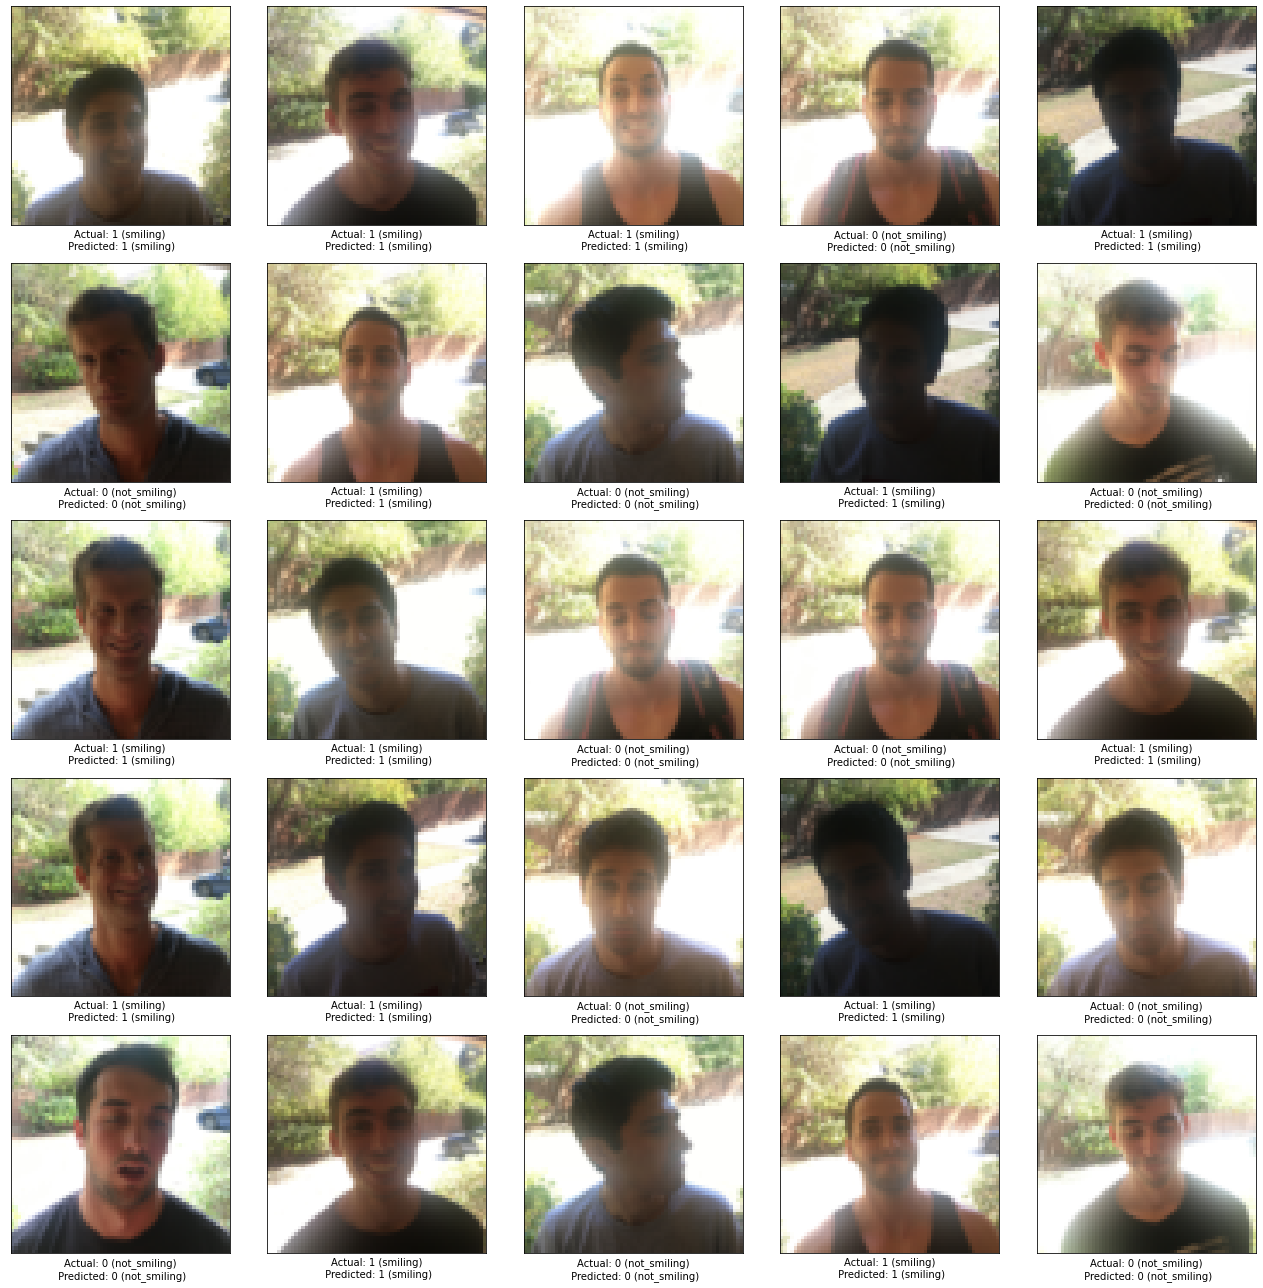

In [44]:
plt.figure(figsize=(18,18))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test_orig[img_index], cmap=plt.cm.gray)
    
    actual_label = int(Y_test_orig[0,img_index])
    predicted_label = int(predicted_val[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, target_names[actual_label], predicted_label, target_names[predicted_label]
    ))
    
plt.tight_layout()
plt.show()


**The Test shows a 100% Accuracy**